# Air Quality Data - Exploratory Data Analysis & Preprocessing
This notebook performs comprehensive EDA and feature engineering on historical air quality data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

## 1. Load and Initial Inspection

In [2]:
# Load data
df = pd.read_csv('AirQuality.csv', sep=';', decimal=',')
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:\n{df.columns.tolist()}")
df.head()

Dataset shape: (9471, 17)

Column names:
['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16']


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [3]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [4]:
# Basic statistics
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


## 2. Data Cleaning

In [5]:
# Combine Date and Time columns
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S', errors='coerce')

# Drop original Date and Time columns
df = df.drop(['Date', 'Time'], axis=1)

# Remove empty columns (last two columns with ;;)
df = df.drop([col for col in df.columns if 'Unnamed' in str(col) or col == ''], axis=1)

# Set DateTime as index
df = df.set_index('DateTime').sort_index()

print(f"Data range: {df.index.min()} to {df.index.max()}")
print(f"\nCleaned shape: {df.shape}")

Data range: 2004-03-10 18:00:00 to 2005-04-04 14:00:00

Cleaned shape: (9471, 13)


In [6]:
# Replace -200 with NaN (sensor failures)
df = df.replace(-200.0, np.nan)

# Check missing values
missing_pct = (df.isnull().sum() / len(df)) * 100
print("Missing values percentage:")
print(missing_pct[missing_pct > 0].sort_values(ascending=False))

Missing values percentage:
NMHC(GT)         90.349488
CO(GT)           18.973709
NO2(GT)          18.540809
NOx(GT)          18.509133
PT08.S1(CO)       5.068103
C6H6(GT)          5.068103
PT08.S2(NMHC)     5.068103
PT08.S3(NOx)      5.068103
PT08.S4(NO2)      5.068103
PT08.S5(O3)       5.068103
T                 5.068103
RH                5.068103
AH                5.068103
dtype: float64


In [7]:
# Forward fill missing values (carry last valid observation)
df_filled = df.fillna(method='ffill').fillna(method='bfill')

# Verify no missing values remain
print(f"Remaining missing values: {df_filled.isnull().sum().sum()}")

Remaining missing values: 0


## 3. Calculate AQI
We'll create a simplified AQI based on available pollutants

In [8]:
def calculate_aqi(row):
    """
    Calculate a simplified AQI based on pollutant concentrations
    Normalized to 0-500 scale similar to US AQI
    """
    # Normalize pollutants (rough approximation)
    co_aqi = (row['CO(GT)'] / 40.0) * 100  # CO in mg/m3
    nox_aqi = (row['NOx(GT)'] / 400.0) * 100  # NOx in µg/m3
    no2_aqi = (row['NO2(GT)'] / 200.0) * 100  # NO2 in µg/m3
    benzene_aqi = (row['C6H6(GT)'] / 25.0) * 100  # Benzene in µg/m3
    
    # Take maximum (dominant pollutant)
    aqi = max(co_aqi, nox_aqi, no2_aqi, benzene_aqi)
    
    return min(aqi, 500)  # Cap at 500

df_filled['AQI'] = df_filled.apply(calculate_aqi, axis=1)

print(f"AQI Statistics:")
print(df_filled['AQI'].describe())

AQI Statistics:
count    9471.000000
mean       72.438222
std        46.622465
min         5.600000
25%        41.500000
50%        59.500000
75%        89.250000
max       369.750000
Name: AQI, dtype: float64


In [9]:
# Add AQI categories
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

df_filled['AQI_Category'] = df_filled['AQI'].apply(categorize_aqi)

print("\nAQI Category Distribution:")
print(df_filled['AQI_Category'].value_counts())


AQI Category Distribution:
AQI_Category
Moderate                          4042
Good                              3475
Unhealthy for Sensitive Groups    1320
Unhealthy                          407
Very Unhealthy                     206
Hazardous                           21
Name: count, dtype: int64


## 4. Exploratory Data Analysis

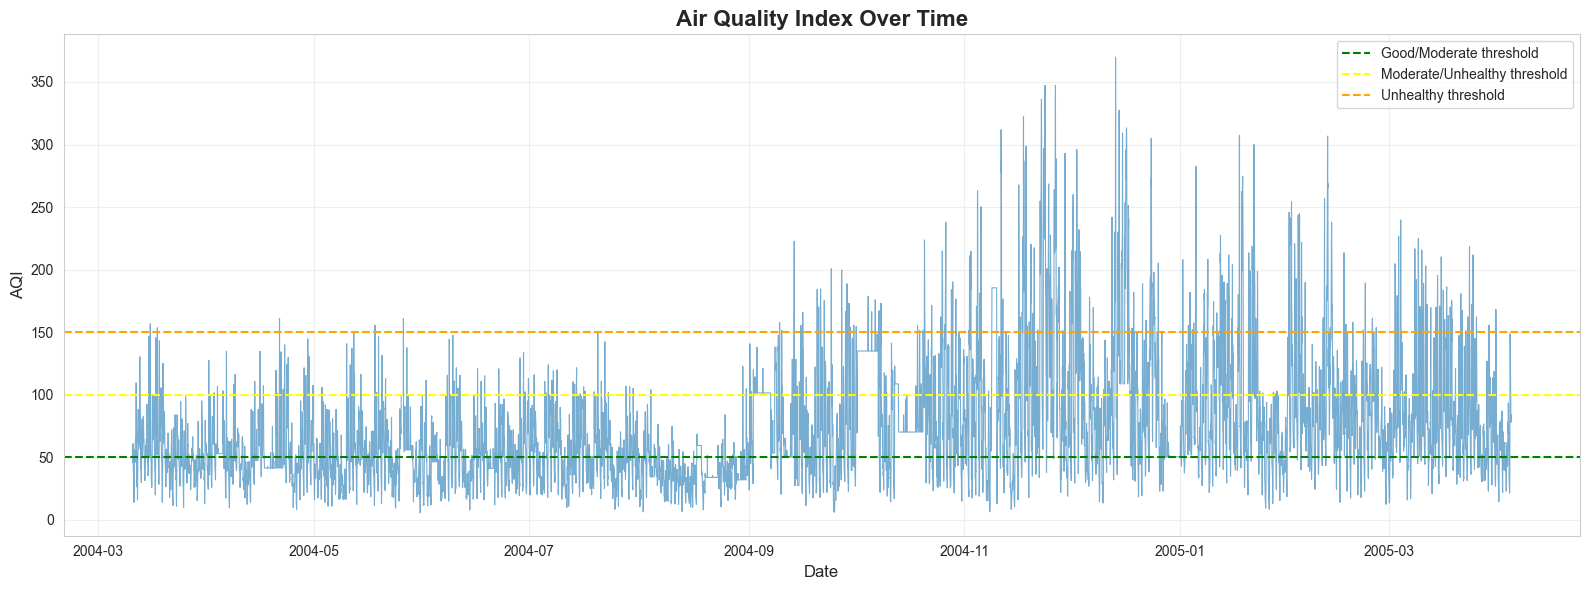

In [10]:
# AQI over time
plt.figure(figsize=(16, 6))
plt.plot(df_filled.index, df_filled['AQI'], alpha=0.6, linewidth=0.8)
plt.title('Air Quality Index Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.axhline(y=50, color='green', linestyle='--', label='Good/Moderate threshold')
plt.axhline(y=100, color='yellow', linestyle='--', label='Moderate/Unhealthy threshold')
plt.axhline(y=150, color='orange', linestyle='--', label='Unhealthy threshold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

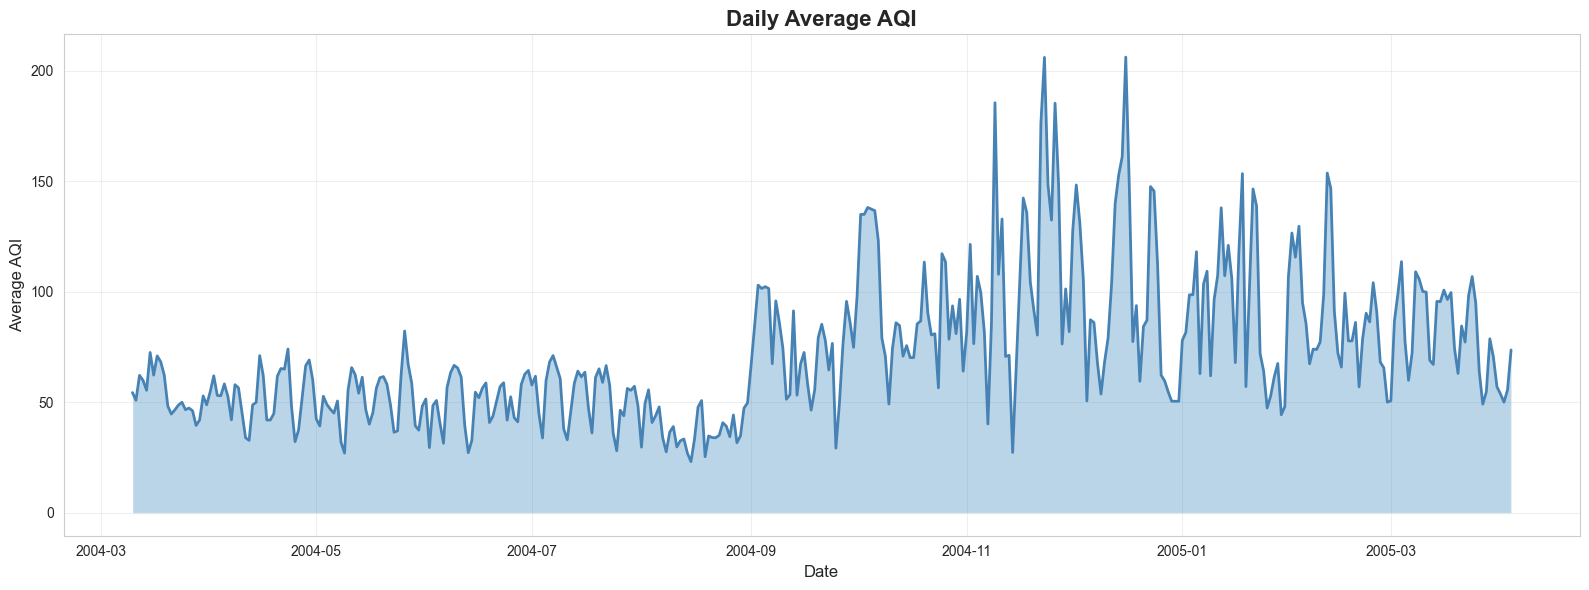

In [11]:
# Daily average AQI
daily_aqi = df_filled['AQI'].resample('D').mean()

plt.figure(figsize=(16, 6))
plt.plot(daily_aqi.index, daily_aqi.values, linewidth=2, color='steelblue')
plt.fill_between(daily_aqi.index, daily_aqi.values, alpha=0.3)
plt.title('Daily Average AQI', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

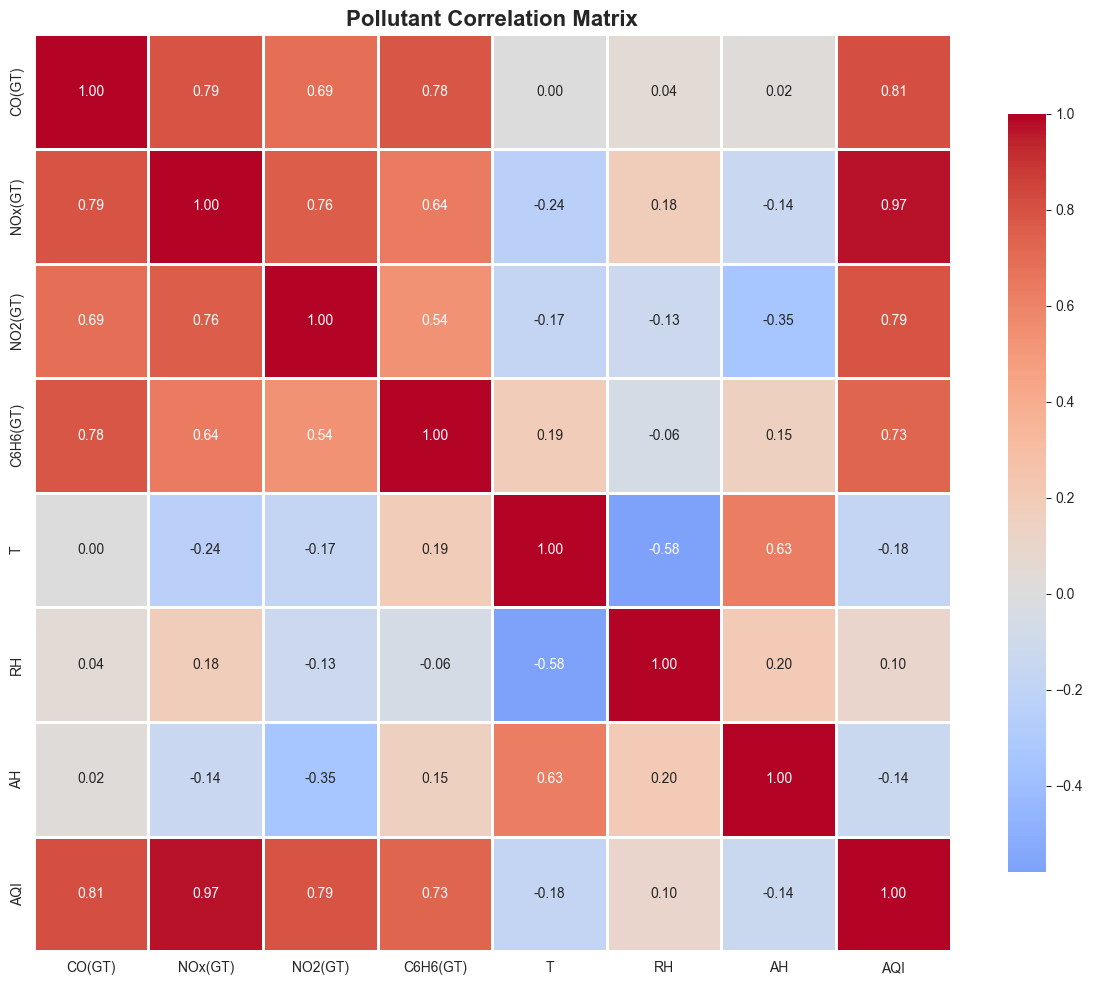

In [12]:
# Pollutant correlations
pollutant_cols = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)', 'T', 'RH', 'AH', 'AQI']
corr_matrix = df_filled[pollutant_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Pollutant Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

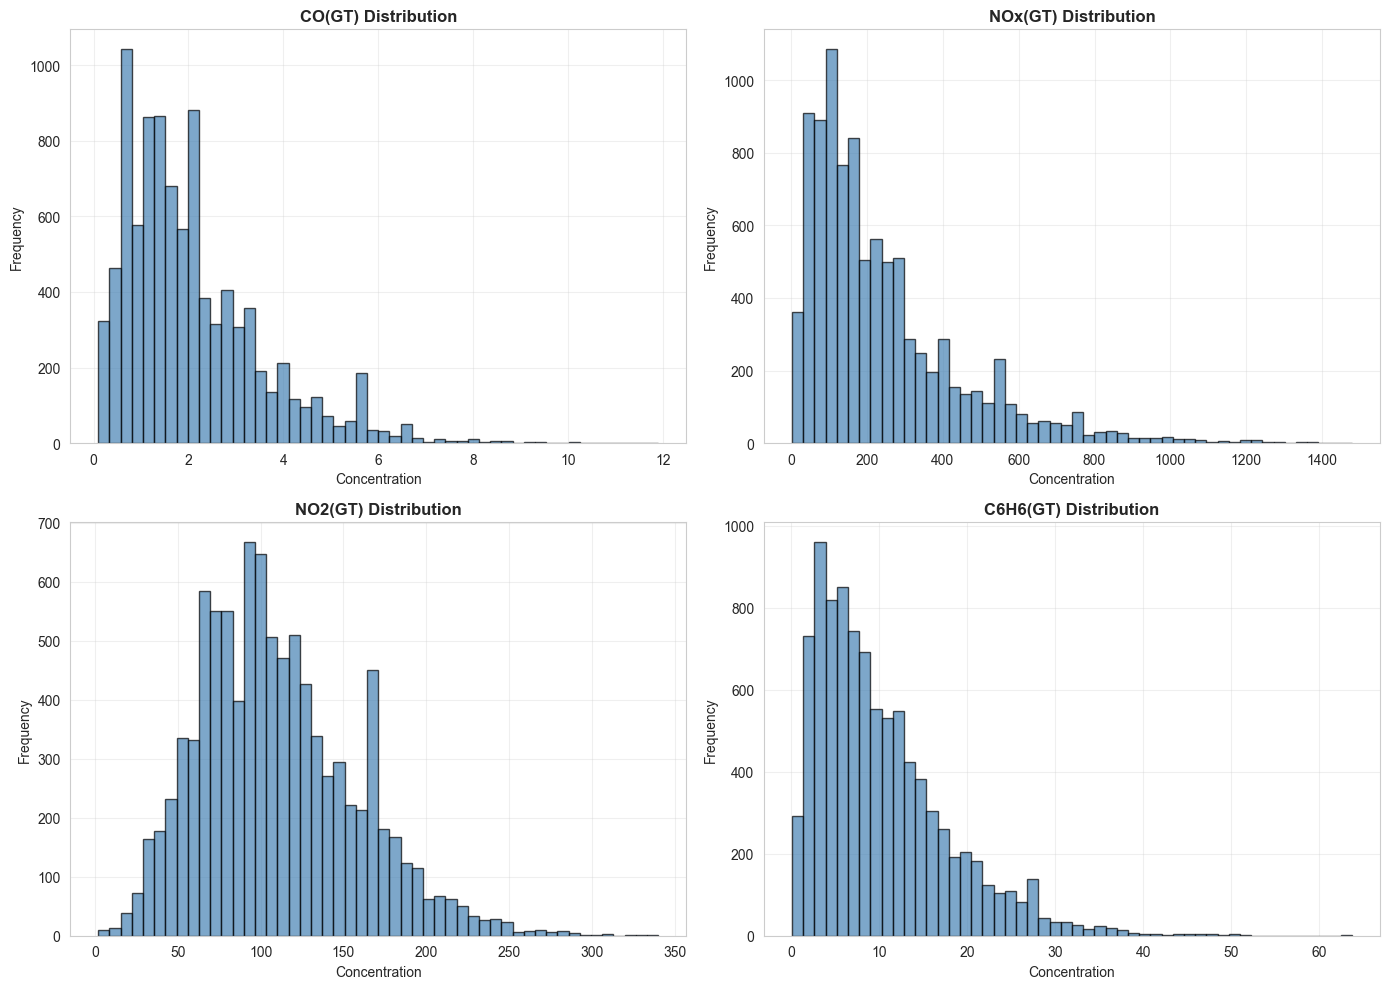

In [13]:
# Distribution of pollutants
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

pollutants = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)']
for idx, pollutant in enumerate(pollutants):
    ax = axes[idx // 2, idx % 2]
    df_filled[pollutant].hist(bins=50, ax=ax, color='steelblue', alpha=0.7, edgecolor='black')
    ax.set_title(f'{pollutant} Distribution', fontsize=12, fontweight='bold')
    ax.set_xlabel('Concentration', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

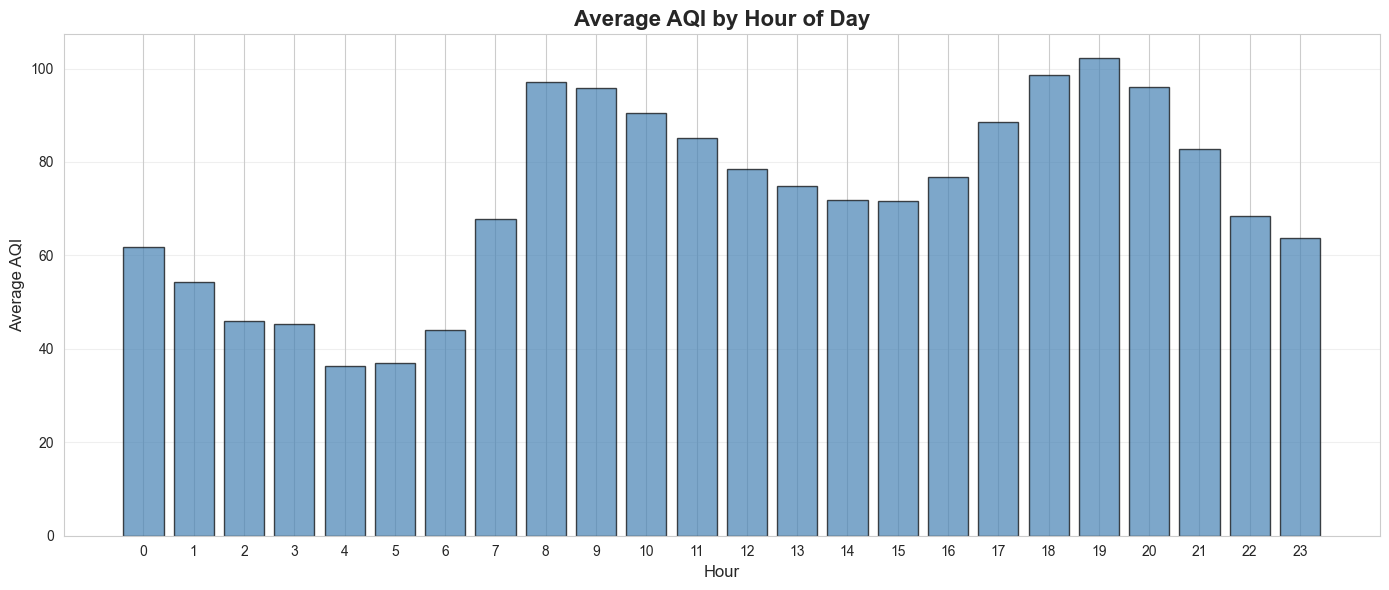

In [14]:
# Hourly patterns
df_filled['Hour'] = df_filled.index.hour
hourly_aqi = df_filled.groupby('Hour')['AQI'].mean()

plt.figure(figsize=(14, 6))
plt.bar(hourly_aqi.index, hourly_aqi.values, color='steelblue', alpha=0.7, edgecolor='black')
plt.title('Average AQI by Hour of Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

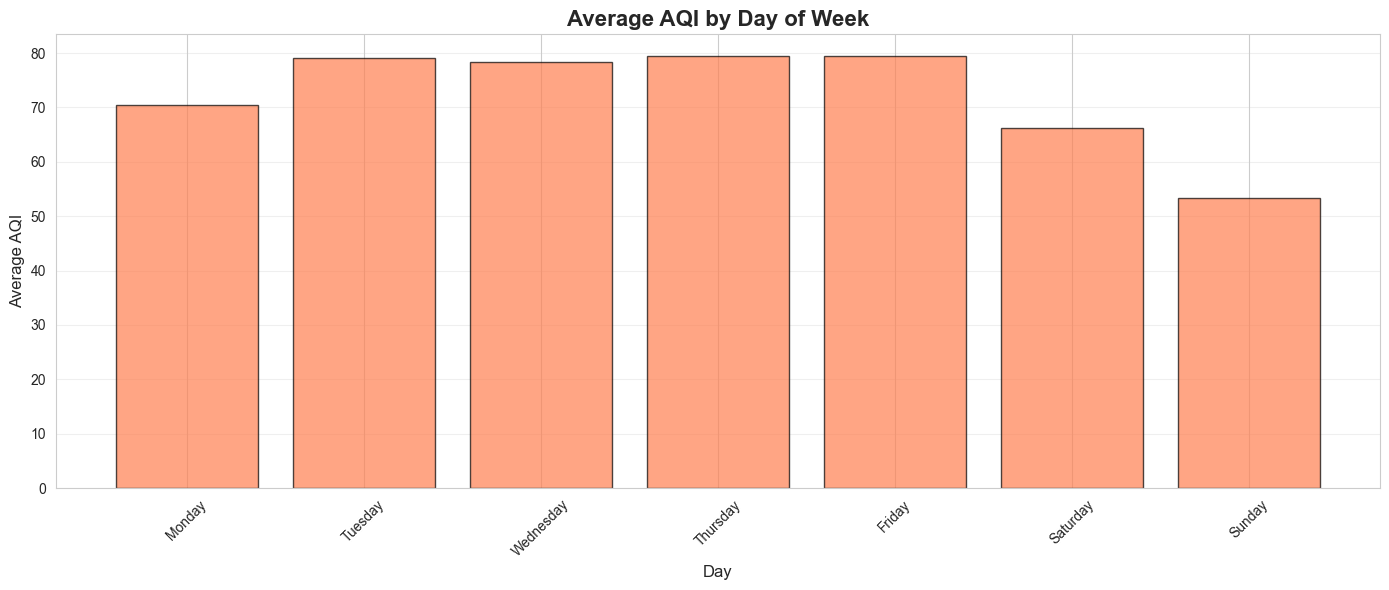

In [15]:
# Day of week patterns
df_filled['DayOfWeek'] = df_filled.index.dayofweek
df_filled['DayName'] = df_filled.index.day_name()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pattern = df_filled.groupby('DayName')['AQI'].mean().reindex(day_order)

plt.figure(figsize=(14, 6))
plt.bar(range(7), daily_pattern.values, color='coral', alpha=0.7, edgecolor='black')
plt.title('Average AQI by Day of Week', fontsize=16, fontweight='bold')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.xticks(range(7), day_order, rotation=45)
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 5. Feature Engineering

In [16]:
# Create temporal features
df_filled['Month'] = df_filled.index.month
df_filled['DayOfMonth'] = df_filled.index.day
df_filled['DayOfYear'] = df_filled.index.dayofyear
df_filled['WeekOfYear'] = df_filled.index.isocalendar().week
df_filled['IsWeekend'] = (df_filled['DayOfWeek'] >= 5).astype(int)

# Cyclical features (to capture periodicity)
df_filled['Hour_sin'] = np.sin(2 * np.pi * df_filled['Hour'] / 24)
df_filled['Hour_cos'] = np.cos(2 * np.pi * df_filled['Hour'] / 24)
df_filled['Month_sin'] = np.sin(2 * np.pi * df_filled['Month'] / 12)
df_filled['Month_cos'] = np.cos(2 * np.pi * df_filled['Month'] / 12)
df_filled['DayOfWeek_sin'] = np.sin(2 * np.pi * df_filled['DayOfWeek'] / 7)
df_filled['DayOfWeek_cos'] = np.cos(2 * np.pi * df_filled['DayOfWeek'] / 7)

print("Temporal features created")

Temporal features created


In [17]:
# Lag features (previous hours)
lag_hours = [1, 2, 3, 6, 12, 24]

for lag in lag_hours:
    df_filled[f'AQI_lag_{lag}h'] = df_filled['AQI'].shift(lag)
    df_filled[f'CO_lag_{lag}h'] = df_filled['CO(GT)'].shift(lag)
    df_filled[f'NOx_lag_{lag}h'] = df_filled['NOx(GT)'].shift(lag)
    df_filled[f'Temp_lag_{lag}h'] = df_filled['T'].shift(lag)

print(f"Created lag features for: {lag_hours}")

Created lag features for: [1, 2, 3, 6, 12, 24]


In [18]:
# Rolling statistics (moving averages and std)
windows = [6, 12, 24]  # hours

for window in windows:
    df_filled[f'AQI_rolling_mean_{window}h'] = df_filled['AQI'].rolling(window=window).mean()
    df_filled[f'AQI_rolling_std_{window}h'] = df_filled['AQI'].rolling(window=window).std()
    df_filled[f'CO_rolling_mean_{window}h'] = df_filled['CO(GT)'].rolling(window=window).mean()
    df_filled[f'NOx_rolling_mean_{window}h'] = df_filled['NOx(GT)'].rolling(window=window).mean()

print(f"Created rolling features for windows: {windows}")

Created rolling features for windows: [6, 12, 24]


In [19]:
# Rate of change features
df_filled['AQI_change_1h'] = df_filled['AQI'].diff(1)
df_filled['AQI_change_3h'] = df_filled['AQI'].diff(3)
df_filled['Temp_change_1h'] = df_filled['T'].diff(1)
df_filled['RH_change_1h'] = df_filled['RH'].diff(1)

print("Rate of change features created")

Rate of change features created


In [20]:
# Drop rows with NaN from feature creation
df_features = df_filled.dropna()

print(f"\nFinal dataset shape after feature engineering: {df_features.shape}")
print(f"Total features: {len(df_features.columns)}")


Final dataset shape after feature engineering: (9333, 69)
Total features: 69


## 6. Save Processed Data

In [21]:
# Save processed data
df_features.to_csv('processed_air_quality.csv')
print("Processed data saved to 'processed_air_quality.csv'")

# Save feature list for later use
feature_cols = [col for col in df_features.columns if col not in ['AQI', 'AQI_Category', 'DayName']]
with open('feature_columns.txt', 'w') as f:
    f.write('\n'.join(feature_cols))
print(f"Feature list saved ({len(feature_cols)} features)")

Processed data saved to 'processed_air_quality.csv'
Feature list saved (66 features)


In [22]:
# Display final feature set
print("\nFinal Feature Set:")
print(df_features.columns.tolist())


Final Feature Set:
['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'AQI', 'AQI_Category', 'Hour', 'DayOfWeek', 'DayName', 'Month', 'DayOfMonth', 'DayOfYear', 'WeekOfYear', 'IsWeekend', 'Hour_sin', 'Hour_cos', 'Month_sin', 'Month_cos', 'DayOfWeek_sin', 'DayOfWeek_cos', 'AQI_lag_1h', 'CO_lag_1h', 'NOx_lag_1h', 'Temp_lag_1h', 'AQI_lag_2h', 'CO_lag_2h', 'NOx_lag_2h', 'Temp_lag_2h', 'AQI_lag_3h', 'CO_lag_3h', 'NOx_lag_3h', 'Temp_lag_3h', 'AQI_lag_6h', 'CO_lag_6h', 'NOx_lag_6h', 'Temp_lag_6h', 'AQI_lag_12h', 'CO_lag_12h', 'NOx_lag_12h', 'Temp_lag_12h', 'AQI_lag_24h', 'CO_lag_24h', 'NOx_lag_24h', 'Temp_lag_24h', 'AQI_rolling_mean_6h', 'AQI_rolling_std_6h', 'CO_rolling_mean_6h', 'NOx_rolling_mean_6h', 'AQI_rolling_mean_12h', 'AQI_rolling_std_12h', 'CO_rolling_mean_12h', 'NOx_rolling_mean_12h', 'AQI_rolling_mean_24h', 'AQI_rolling_std_24h', 'CO_rolling_mean_24h', 'NOx_rolling_mean_24h', 'AQ